In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#filepath
file_path = '/Volumes/SHAYNE SSD/Project_Datasets/used_car/vehicles.csv'

#datframe
df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [10]:
columns_to_drop = [
    'id', 'url', 'region', 'region_url', 'VIN', 'image_url', 
    'description', 'county', 'state', 'lat', 'long', 'paint_color', 'size',
    'posting_date'
]

df_cleaned = df.drop(columns = columns_to_drop)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  type          334022 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


In [11]:
#find age of car
current_year = df_cleaned['year'].max() + 1

df_cleaned['car_age'] = current_year - df_cleaned['year']
df_cleaned = df_cleaned.drop(columns = ['year'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   manufacturer  409234 non-null  object 
 2   model         421603 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  car_age       425675 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


In [12]:
df_cleaned.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,car_age
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
missing_data = df_cleaned.isnull().sum()
print(missing_data)

price                0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
car_age           1205
dtype: int64


In [14]:
print(len(df_cleaned))

df_cleaned = df_cleaned.dropna(subset = ['price', 'odometer'])

print(f"after dropping rows: {len(df_cleaned)}")
print(df_cleaned.isnull().sum())

426880
after dropping rows: 422480
price                0
manufacturer     17397
model             5195
condition       171619
cylinders       174778
fuel              2372
odometer             0
title_status      7602
transmission      1695
drive           129080
type             91904
car_age           1136
dtype: int64


In [15]:
columns_to_fill = df_cleaned.isnull().sum()
columns_to_fill = columns_to_fill[columns_to_fill > 0].index.tolist()

print(columns_to_fill)

for col in columns_to_fill:
    df_cleaned[col].fillna('Uknown', inplace = True)
    print(f"filled NaN in {col} with 'unknown'")
print(df_cleaned.isnull().sum())

['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'car_age']
filled NaN in manufacturer with 'unknown'
filled NaN in model with 'unknown'
filled NaN in condition with 'unknown'
filled NaN in cylinders with 'unknown'
filled NaN in fuel with 'unknown'
filled NaN in title_status with 'unknown'
filled NaN in transmission with 'unknown'
filled NaN in drive with 'unknown'
filled NaN in type with 'unknown'
filled NaN in car_age with 'unknown'
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
car_age         0
dtype: int64


/var/folders/6w/dytfq45576ldxw8pq312lp5c0000gn/T/ipykernel_51970/2340588863.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna('Uknown', inplace = True)
/var/folders/6w/dytfq45576ldxw8pq312lp5c0000gn/T/ipykernel_51970/2340588863.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Uknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned[col].fillna('Uknown', inplace = Tr

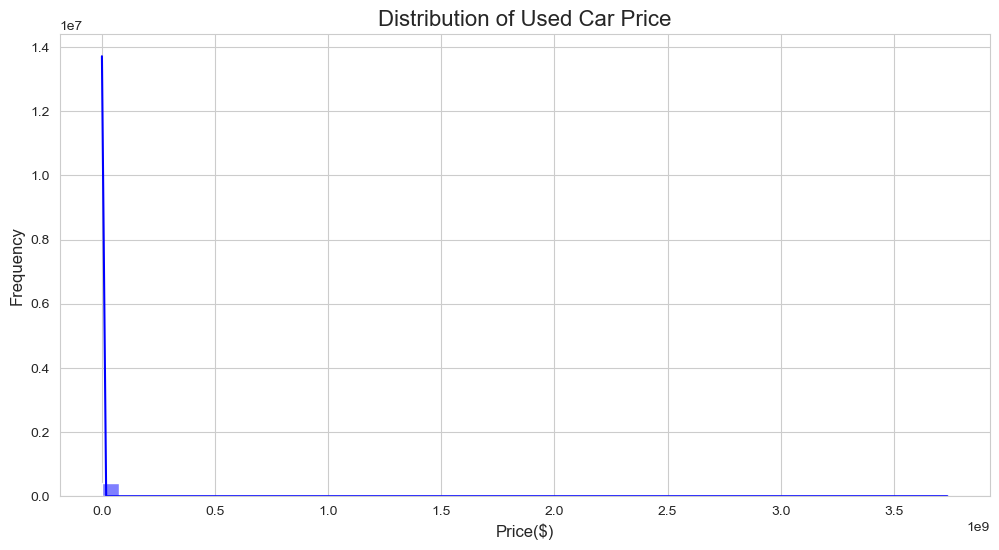

ori number of rows: 422480
number afte cleaned: 377074
cleaned number of rows: 45406


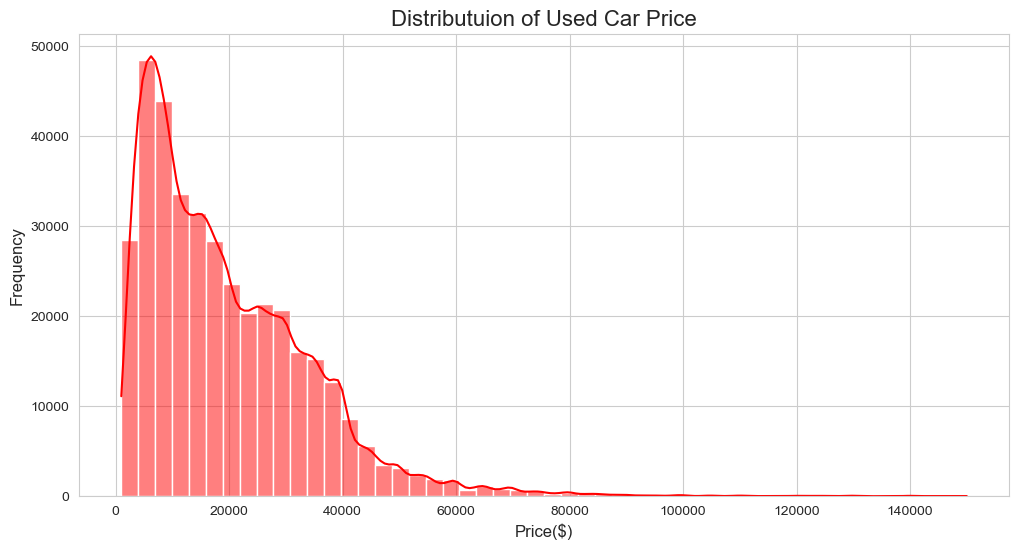

skewness of price: 1.5244249578011089


In [16]:
#EDA

sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.histplot(df_cleaned['price'], kde = True, bins = 50, color = 'blue')
plt.title('Distribution of Used Car Price', fontsize = 16)
plt.xlabel('Price($)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

price_min = 1000
price_max = 150000

df_filtered = df_cleaned[
    (df_cleaned['price'] > price_min) &
    (df_cleaned['price'] < price_max)
].copy()

print(f'ori number of rows: {len(df_cleaned)}')
print(f'number afte cleaned: {len(df_filtered)}')
print(f'cleaned number of rows: {len(df_cleaned)-len(df_filtered)}')

sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.histplot(df_filtered['price'], kde = True, bins = 50, color = 'red')
plt.title('Distributuion of Used Car Price', fontsize = 16)
plt.xlabel('Price($)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

price_skewness = df_filtered['price'].skew()
print(f"skewness of price: {price_skewness}")

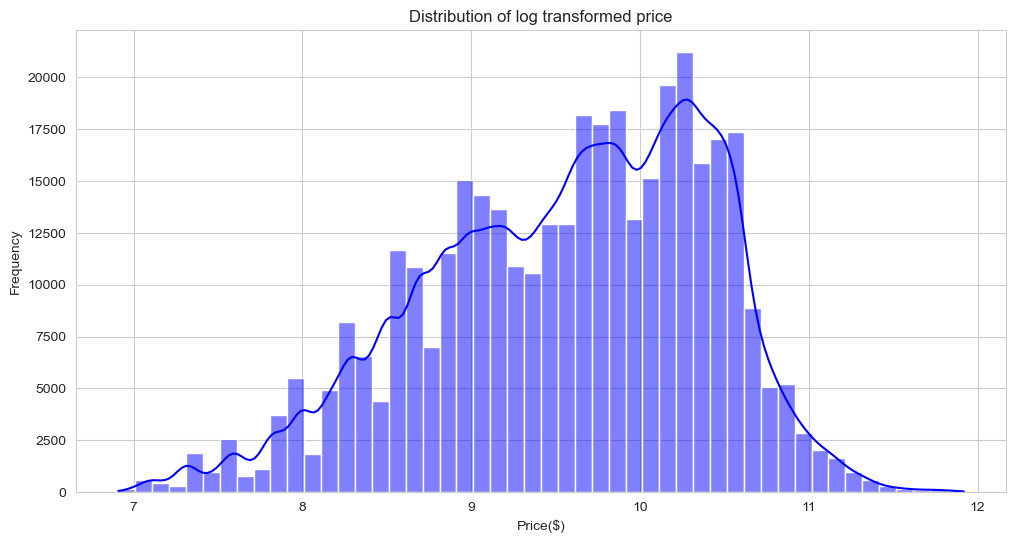

new skewness: -0.43685777860757086


In [17]:
#transforming skewed price with log

df_filtered['log_price'] = np.log(df_filtered['price'])

plt.figure(figsize = (12, 6))
sns.histplot(df_filtered['log_price'], kde = True, bins = 50, color = 'blue')
plt.title('Distribution of log transformed price')
plt.xlabel('Price($)')
plt.ylabel('Frequency')

plt.show()

new_skewness = df_filtered['log_price'].skew()
print(f"new skewness: {new_skewness}")

top 15 manufacturer: Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', 'ram', 'gmc',
       'Uknown', 'bmw', 'dodge', 'mercedes-benz', 'hyundai', 'subaru',
       'volkswagen'],
      dtype='object', name='manufacturer')


/var/folders/6w/dytfq45576ldxw8pq312lp5c0000gn/T/ipykernel_51970/4035832939.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'manufacturer', y = 'log_price', data = df_top15m, palette = 'tab20')


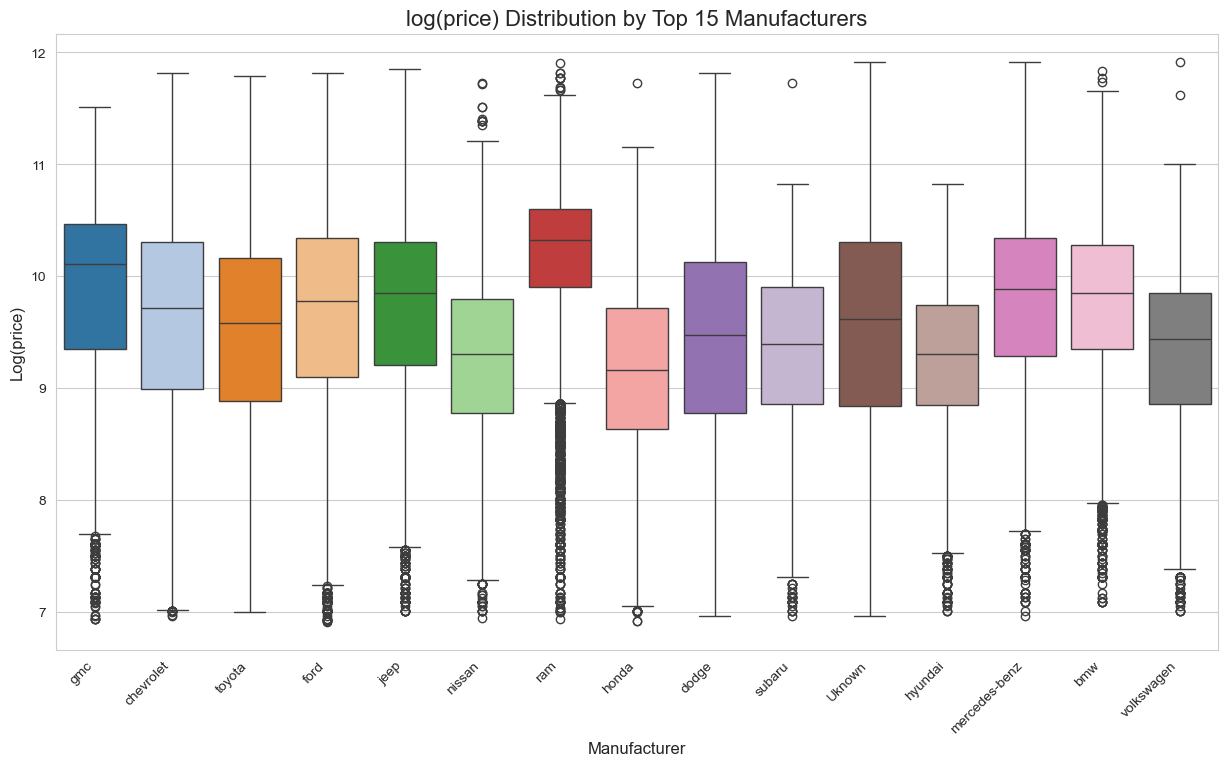

manufacturer
ram              30438.5
gmc              24590.0
mercedes-benz    19640.0
jeep             18995.0
bmw              18897.0
ford             17596.5
chevrolet        16590.0
Uknown           15000.0
toyota           14442.5
dodge            12990.0
volkswagen       12515.0
subaru           11995.0
hyundai          10990.0
nissan           10950.0
honda             9500.0
Name: price, dtype: float64


In [18]:
top_15_manufacturer = df_filtered['manufacturer'].value_counts().head(15).index
print(f"top 15 manufacturer: {top_15_manufacturer}")

df_top15m = df_filtered[df_filtered['manufacturer'].isin(top_15_manufacturer)]

plt.figure(figsize = (15,8))
sns.boxplot(x = 'manufacturer', y = 'log_price', data = df_top15m, palette = 'tab20')

plt.title('log(price) Distribution by Top 15 Manufacturers', fontsize = 16)
plt.xlabel('Manufacturer', fontsize = 12)
plt.ylabel('Log(price)', fontsize = 12)
plt.xticks(rotation=45, ha='right')
plt.show()

print(df_top15m.groupby('manufacturer')['price'].median().sort_values(ascending = False))


In [19]:
#model prep
X = df_filtered.drop(columns = ['price', 'log_price', 'model'])
y = df_filtered['log_price']

X_encoded = pd.get_dummies(X, drop_first = True)
print('one-hot encoding complete')
print(f"shape of data before encoding: {X.shape}")
print(f"shape of data after encoding: {X_encoded.shape}")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

print(f"total samples: {len(X_encoded)}")
print(f"training samples: {len(X_train)}")
print(f"test samples: {len(X_test)}")

one-hot encoding complete
shape of data before encoding: (377074, 11)
shape of data after encoding: (377074, 27243)
total samples: 377074
training samples: 301659
test samples: 75415


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr_model = LinearRegression()

print('starting training')
lr_model.fit(X_train, y_train)
print('training complete')

y_pred_log = lr_model.predict(X_test)
y_pred_actual = np.exp(y_pred_log)
y_test_actual = np.exp(y_test)

print(f"model evaluation results:")
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"R-squared (R²): {r2:.3f} (Our model explains {r2*100:.1f}% of the price variance)")

mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"Mean Absolute Error (MAE): ${mae:,.2f} (On average, our prediction is off by this amount)")


#result visualisation
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test_actual, y = y_pred_actual, alpha = 0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw = 2)

plt.title('Actual Car Price vs Predicted Car Price', fontsize = 16)
plt.xlabel('Actual Price ($)', fontsize = 12)
plt.ylabel('Predicted Price ($)', fontsize = 12)

plt.show()

starting training
